In [75]:
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dense, MaxPooling2D,Flatten, Dropout,Conv2D
from tensorflow.keras.models import Sequential
import imghdr
import warnings
warnings.filterwarnings('ignore')

In [76]:
image_extension = ['jpeg','jpg','png','bmp']

In [77]:
datasets_dr = os.listdir("../input/imageclassification/data/")
datasets_dr

['sad', 'happy']

In [78]:
datasets_dr = "../input/imageclassification/data/"

for imageClassnames in os.listdir(datasets_dr):
    for individualImage in os.listdir(os.path.join(datasets_dr, imageClassnames)):
        imagePath= os.path.join(datasets_dr, imageClassnames, individualImage)
        try:
            image= cv2.imread(imagePath)
            imageTag= imghdr.what(imagePath)
            if imageTag not in image_extension:
                print("Image Extension is not right {}".format(imagePath))
                os.remove(imagePath)
            
        except Exception as e:
            print("The main issue i {} here, please slove this issue".format(imagePath))
        
        


In [79]:
datasets = tf.keras.utils.image_dataset_from_directory(datasets_dr)

Found 305 files belonging to 2 classes.


In [80]:
datasets_iterate = datasets.as_numpy_iterator()

In [81]:
datasets_batch=datasets_iterate.next()

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


In [82]:
# datasets_batch[0]

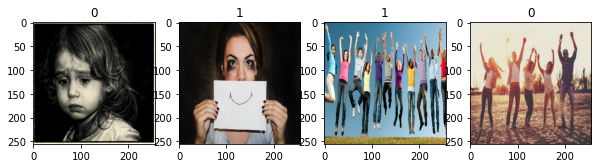

In [83]:
fig,ax= plt.subplots(ncols=4, figsize=(10,10))
for idx,image in enumerate (datasets_batch[0][20:24]):
    ax[idx].imshow(image.astype ('int'))
    ax[idx].title.set_text(datasets_batch[1][idx])

In [84]:
def randomImageShow():
    datasets_batch=datasets_iterate.next()
    fig,ax= plt.subplots(ncols=4, figsize=(10,10))
    for idx,image in enumerate (datasets_batch[0][20:24]):
        ax[idx].imshow(image.astype ('int'))
        ax[idx].title.set_text(datasets_batch[1][idx])
    
    
    

Cleanup called...


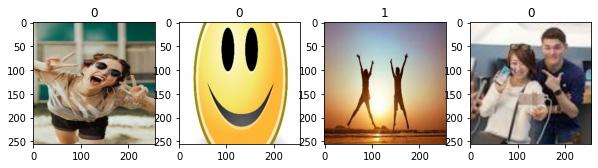

In [85]:
 randomImageShow()

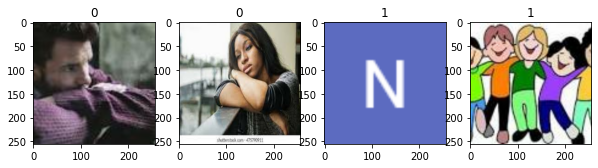

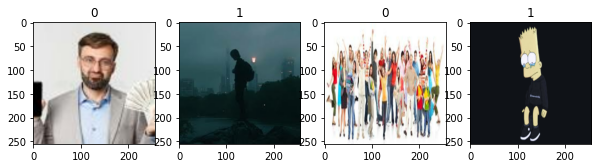

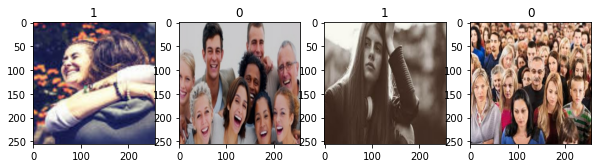

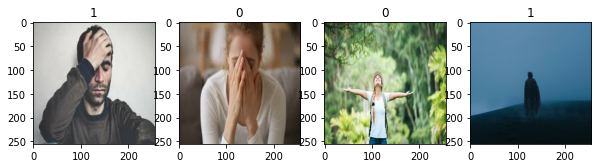

In [86]:
for i in range(4):
    randomImageShow()

In [87]:
datasetsScalling= datasets.map(lambda x, y: (x/255, y))

In [88]:
datasetsScalling.as_numpy_iterator().next()

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


(array([[[[5.0649512e-01, 5.6924021e-01, 5.2610296e-01],
          [5.2132350e-01, 5.8406866e-01, 5.4093134e-01],
          [5.3553921e-01, 5.9828430e-01, 5.4901963e-01],
          ...,
          [9.6556371e-01, 9.6164215e-01, 9.5379901e-01],
          [9.6862745e-01, 9.6470588e-01, 9.5686275e-01],
          [9.6862745e-01, 9.6470588e-01, 9.5686275e-01]],
 
         [[5.0649512e-01, 5.6924021e-01, 5.2610296e-01],
          [5.2132350e-01, 5.8406866e-01, 5.4093134e-01],
          [5.3553921e-01, 5.9828430e-01, 5.4901963e-01],
          ...,
          [9.6486843e-01, 9.6094686e-01, 9.5310372e-01],
          [9.6544886e-01, 9.6152729e-01, 9.5368415e-01],
          [9.6544886e-01, 9.6152729e-01, 9.5368415e-01]],
 
         [[5.0649512e-01, 5.6924021e-01, 5.2610296e-01],
          [5.2132350e-01, 5.8406866e-01, 5.4093134e-01],
          [5.3553921e-01, 5.9828430e-01, 5.4901963e-01],
          ...,
          [9.6470588e-01, 9.6078432e-01, 9.5294118e-01],
          [9.6470588e-01, 9.6078432e-

In [89]:
trainCategory= int(len(datasetsScalling)*0.7)
testingCate= int(len(datasetsScalling)*0.2)
validationCat = int(len(datasetsScalling)*0.1)

In [90]:
train= datasetsScalling.take(trainCategory)
valid=datasetsScalling.skip(trainCategory).take(validationCat)
test=datasetsScalling.skip(trainCategory+validationCat).take(testingCate)


In [91]:
model=Sequential()
#Input Layers
model.add(Conv2D(16, kernel_size=(3,3), strides=1, activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

#1st Hidden Layers
model.add(Conv2D(32,kernel_size=(3,3),strides=1,activation='relu'))
model.add(MaxPooling2D())

#2nd Hidden Layers
model.add(Conv2D(64,kernel_size=(3,3),strides=1,activation='relu'))
model.add(MaxPooling2D())


model.add(Flatten())

#Connected Layer or Output Layer
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation = "sigmoid"))

In [92]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 57600)            

In [93]:
model.compile(optimizer='adam',
             loss="BinaryCrossentropy",
             metrics=['accuracy'])

In [94]:
#os.makedirs("../working/logs")

In [95]:
log_dir= "../working/logs"

In [96]:
tensboard=tf.keras.callbacks.TensorBoard(log_dir= log_dir)

2022-11-16 09:20:50.948560: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-11-16 09:20:50.948746: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-11-16 09:20:50.949474: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


In [97]:
history= model.fit(train,
                  epochs=20,
                  validation_data=valid,
                  callbacks=[tensboard])

Epoch 1/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


1/7 [===>..........................] - ETA: 20s - loss: 0.6963 - accuracy: 0.4062

2022-11-16 09:20:54.424371: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-11-16 09:20:54.424962: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


2/7 [=======>......................] - ETA: 2s - loss: 3.9817 - accuracy: 0.4844 

2022-11-16 09:20:54.908158: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-11-16 09:20:54.911453: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-11-16 09:20:54.914616: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ../working/logs/train/plugins/profile/2022_11_16_09_20_54

2022-11-16 09:20:54.916469: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ../working/logs/train/plugins/profile/2022_11_16_09_20_54/46ec183e56d7.trace.json.gz
2022-11-16 09:20:54.921204: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ../working/logs/train/plugins/profile/2022_11_16_09_20_54

2022-11-16 09:20:54.922254: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to ../working/logs/train/plugins/profile/2022_11_16_09_20_54/46ec183e56d7.memory_p

7/7 [==============================] - ETA: 0s - loss: 1.8351 - accuracy: 0.5089

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 9s 868ms/step - loss: 1.8351 - accuracy: 0.5089 - val_loss: 0.6817 - val_accuracy: 0.6250
Epoch 2/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.6815 - accuracy: 0.5848

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 820ms/step - loss: 0.6815 - accuracy: 0.5848 - val_loss: 0.6694 - val_accuracy: 0.5938
Epoch 3/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.5546 - accuracy: 0.7277

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 836ms/step - loss: 0.5546 - accuracy: 0.7277 - val_loss: 0.5186 - val_accuracy: 0.7500
Epoch 4/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.4317 - accuracy: 0.7902

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 820ms/step - loss: 0.4317 - accuracy: 0.7902 - val_loss: 0.2827 - val_accuracy: 0.9062
Epoch 5/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.3220 - accuracy: 0.9107

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 821ms/step - loss: 0.3220 - accuracy: 0.9107 - val_loss: 0.3318 - val_accuracy: 0.8438
Epoch 6/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.2702 - accuracy: 0.8929

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 860ms/step - loss: 0.2702 - accuracy: 0.8929 - val_loss: 0.0986 - val_accuracy: 1.0000
Epoch 7/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.1549 - accuracy: 0.9286

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 825ms/step - loss: 0.1549 - accuracy: 0.9286 - val_loss: 0.0484 - val_accuracy: 1.0000
Epoch 8/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.0690 - accuracy: 0.9955

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 818ms/step - loss: 0.0690 - accuracy: 0.9955 - val_loss: 0.0380 - val_accuracy: 1.0000
Epoch 9/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.0508 - accuracy: 0.9777

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 829ms/step - loss: 0.0508 - accuracy: 0.9777 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 10/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.0585 - accuracy: 0.9866

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 916ms/step - loss: 0.0585 - accuracy: 0.9866 - val_loss: 0.0398 - val_accuracy: 1.0000
Epoch 11/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.0410 - accuracy: 0.9911

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 821ms/step - loss: 0.0410 - accuracy: 0.9911 - val_loss: 0.0179 - val_accuracy: 1.0000
Epoch 12/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.0381 - accuracy: 0.9911

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 808ms/step - loss: 0.0381 - accuracy: 0.9911 - val_loss: 0.0448 - val_accuracy: 0.9688
Epoch 13/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.0260 - accuracy: 0.9955

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 817ms/step - loss: 0.0260 - accuracy: 0.9955 - val_loss: 0.0162 - val_accuracy: 1.0000
Epoch 14/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.0139 - accuracy: 0.9955

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 871ms/step - loss: 0.0139 - accuracy: 0.9955 - val_loss: 0.0199 - val_accuracy: 1.0000
Epoch 15/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.0176 - accuracy: 0.9911

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 814ms/step - loss: 0.0176 - accuracy: 0.9911 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 16/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.0241 - accuracy: 0.9866

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 819ms/step - loss: 0.0241 - accuracy: 0.9866 - val_loss: 0.0260 - val_accuracy: 0.9688
Epoch 17/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.0091 - accuracy: 1.0000

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 806ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 18/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.0156 - accuracy: 0.9955

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 829ms/step - loss: 0.0156 - accuracy: 0.9955 - val_loss: 0.0092 - val_accuracy: 1.0000
Epoch 19/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.0111 - accuracy: 0.9955

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 818ms/step - loss: 0.0111 - accuracy: 0.9955 - val_loss: 0.0257 - val_accuracy: 0.9688
Epoch 20/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.0131 - accuracy: 0.9911

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 809ms/step - loss: 0.0131 - accuracy: 0.9911 - val_loss: 7.7592e-04 - val_accuracy: 1.0000


In [98]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

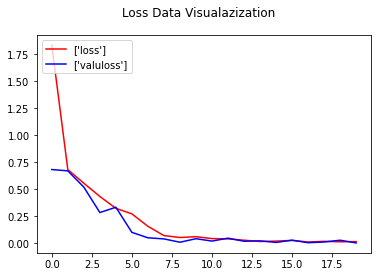

In [99]:
fig=plt.figure()
plt.plot(history.history['loss'],color='red',label=['loss'])
plt.plot(history.history['val_loss'],color='blue',label=['valuloss'])
plt.suptitle("Loss Data Visualazization")
plt.legend(loc = "upper left")
plt.show()

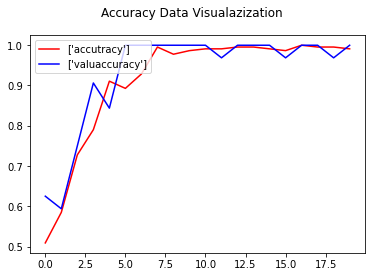

In [100]:
fig=plt.figure()
plt.plot(history.history['accuracy'],color='red',label=['accutracy'])
plt.plot(history.history['val_accuracy'],color='blue',label=['valuaccuracy'])
plt.suptitle("Accuracy Data Visualazization")
plt.legend(loc = "upper left")
plt.show()

In [101]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [102]:
Precision_data=Precision()
RecallData= Recall()
BinaryAccuracyData= BinaryAccuracy()

In [103]:
for batch in test.as_numpy_iterator():
    x,y= batch
    yPredict= model.predict(x)
    Precision_data(y,yPredict)
    RecallData(y,yPredict)
    BinaryAccuracyData(y,yPredict)

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


In [104]:
print(Precision_data.result(), "\n" , RecallData.result(),"\n", BinaryAccuracyData.result())

tf.Tensor(1.0, shape=(), dtype=float32) 
 tf.Tensor(1.0, shape=(), dtype=float32) 
 tf.Tensor(1.0, shape=(), dtype=float32)


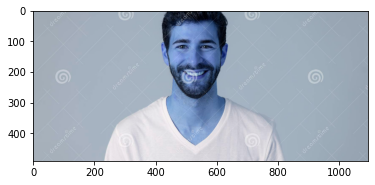

In [111]:
testImageData=cv2.imread("../input/testsmiledata2/Capture.PNG")
plt.imshow(testImageData)
plt.show()

In [112]:
resizeImageData= tf.image.resize(testImageData,(256,256))

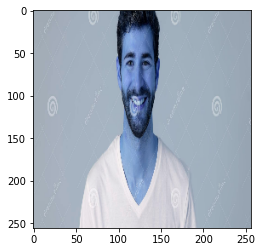

In [113]:
plt.imshow(resizeImageData.numpy().astype('int'))
plt.show()

In [114]:
testImageDataPredict= model.predict(np.expand_dims(resizeImageData/255, 0))

In [115]:
if testImageDataPredict > 0.5:
    print("Happy Image")
else:
    print("Sad Image")

Happy Image
